# Evaluation formative 4 - Quantum Machine Learning

## Supervised learning

The basic structure of a supervised pattern recognition or prediction task can be formally defined as follows.

**Given an input domain $\mathcal{X}$ and an output domain $\mathcal{Y}$, a training data set $\mathcal{D} = \{(x^1,y^1),\ldots, (x^M,y^M)\}$ of training pairs $(x^m,y^m)\in\mathcal{X}\times\mathcal{Y}$ with $m = 1,\ldots, M$ of training inputs $x^m$ and target outputs $y^m$, as well as a new unclassified input $\tilde{x}\in\mathcal{X}$, guess or predict the corresponding output $\tilde{y}\in\mathcal{Y}$.**

The input domain $\mathcal{X}$ will mostly be chosen to be the space $\mathbb{R}^N$ of real N-dimensional vectors, or for binary variables, the space of N-bit binary strings $\{0, 1\}^N$. The input vectors are also called **feature vectors** as they represent information on carefully selected features of an instance. In cases where the raw data is not from a numerical domain or does not have an obvious distance measure between instances one has to first find a suitable representation that maps the elements to numerical values.



### Supervised pattern classification tasks in real-life applications

Complete the following sentences with **classification** and **regression**:

1. **Regression** is about finding a function to predict the relationship between
some input and the dependent continuous output value. Given you know the
income and the effective tax rates of your friends, can you estimate your tax
rate given your income even though you don't know the actual calculation?

**oui il est possible de connaitre mon taux d'imposition à partir de mesrevenus en utilisant un model de regression pour trouver une fonction entre les revenus et le taux d'imposition de mes amis afin de l'utiliser pour prédire mon taux d'imposition**

2. In **the classification**, we try to predict the discrete label of an instance. Given the
input and a set of possible labels, which one is it? 

**La prédiction de l'étiquette de classe pour une instance donnée est basée sur les caractéristiques ou les variables de cette instance qui servent d'entrée pour le modèle de classification.**



In the table given below, which gives somes examples of supervised pattern classification tasks in real-life applications, specify in the third colum, the type of tasks by writing (1) for ***Binary classification tasks***; (2) for ***Regression tasks*** and (3) for ***Multi-label classification tasks***.

|Input| Output| Type of tasks
|:-----|:------|-------------|
|Last month's oil price| Tomorrow's oil price|2 |
|Search history of a user|Chance to click on a car ad|3 |
Insurance customer details| Chance of claiming| 3|
|Images| Car, train or plane?|3 |
|Recording of speech|Words contained in speech|3 |
|Text segment| Prediction of next word to follow| 3|
|Text| French or English?|1 |
|Video| Contains a car?|1|
|Email| Is spam?| 1|
|Spectrum of cancer cell| Malicious?|1 |


### Life Cycle of a Machine Learning Project

Despite the diverse applications of machine learning, most machine learning projects follow a typical life cycle that includes some (or all) of the following steps : Visualize the data; Examine the data; Split the Dataset; Data Preprocessing; Load the data; Evaluate the models;  Train the Models.  Put that steps in the right order.
1. ....
2. ....
3. ....
4. ....
5. ....
6. ....
7. ....

### Sklearn 

**Sklearn** est la librairie qui contient toutes les fonctions de l’état de l'art du Machine Learning. On y trouve les algorithmes les plus importants ainsi que diverses fonctions de pre-processing. 

Avec Sklearn, il suffit d'écrire quelques lignes pour développer des modèles de ML supervisés. Pour un modèle de Support Vector Classifier (SVC) par exemple, les fonctions suivantes
 sont utiliser pour... (compléter le tableau, x et y étant respectivement les features et les labels/target)

|Fonction| pour ....   |
|--------|-------------|
|model = SVC()| permet de segmenter la base de donnée en deux parties celle qui serira à l'entrainement et celle qui servira au test|
|model.fit(x, y)|permet d'éffectuer l'entrainement du model |
|model.score(x, y) |permet d'évaluer la performance du model|
|model.predict(x) |est une méthode utilisée pour faire des prédictions à partir d'un modèle de machine learning déja entraîné|

## Train a SMILES Dataset with Support Vector Regression

Use a support vector regression (SVR) to predict QED (quantitative estimation of drug-likeness) from molecules of the ZING Dataset contained in the file `'./Dataset/Zn10.txt`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecules 
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import where there needed**.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

In [22]:
PATH = os.getcwd() # change working directoty
data_path = os.path.join(PATH, './UE_PHY4268_Qiskit_Lab2023/Qiskit EF4/Dataset/Zn10.txt')
data_path

'/home/jeams/Téléchargements/./UE_PHY4268_Qiskit_Lab2023/Qiskit EF4/Dataset/Zn10.txt'

In [23]:
with open(data_path,'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
smile

['NC(=O)C1CCCCC1C(F)(F)F',
 'CCCCCNC(=O)N1CCCC1CO',
 'CCC(CC)c1cc(C[NH3+])on1',
 'C[NH2+]C1CCC(c2ccccc2Cl)C1',
 'COc1ccc2c(c1)C(C(C)[NH3+])CN2C',
 'CC1C[NH2+]CCN1CCCc1ccco1',
 'Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C',
 'COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]',
 'Nc1cc(C2CCC[NH2+]2)ccc1O',
 'CN(C)S(=O)(=O)N1CC2CC1C(=O)O2',
 'CC(O)CC[NH2+]C(C)(C)C',
 'C=CC(C)OC(C)CC(=O)[O-]',
 'N#Cc1ccc2cc(C#N)ccc2c1',
 'Cc1ccc(O)c(C2(C)CCCO2)c1',
 'Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]',
 'c1cc(C2NCCc3ccc4c(c32)OCO4)co1',
 '[NH3+]CCCn1c(CCO)nc2cccnc21',
 'CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C',
 'CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2',
 'Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1',
 'C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1',
 'CCc1ccc(-c2cnnc([O-])c2C#N)cc1',
 'Cc1cc(C(N)=[NH2+])c(C2CC2)o1',
 'CCCCN(C)c1nccc(C(=O)[O-])n1',
 'CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1',
 'CC(=CC(=O)NCC1CC1)c1ccccc1',
 'CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1',
 'CNC(=O)c1cc(O)c2ccc(OC)cc2c1',
 'CCC(CO)Nc1nc(C)c(C)c(Cl)n1',
 'Cc1ccsc1-c1c[nH]cc1C[NH3+]',
 'Cc1

In [24]:
df = pd.DataFrame(data=smile, columns=['ZincSmiles'])
df

ZincSmiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

ZincSmiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                        Zinc_Molecules  
0     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288eb0>  
1     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288f20>  
2     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288f90>  
3     <rdkit.Chem.rdchem.Mol object at 0x7f6c63289000>  
4     <rdkit.Chem.rdchem.Mol object at 0x7f6c63289070>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e490>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e500>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e570>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e5e0>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e650>  

[6000 rows x 2 columns]
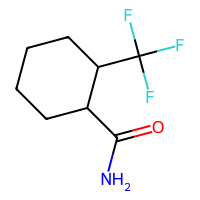
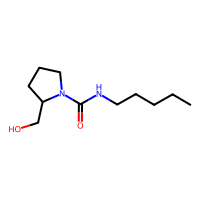
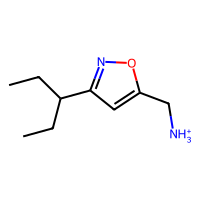
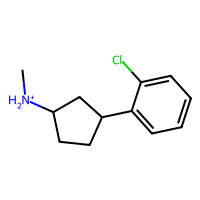
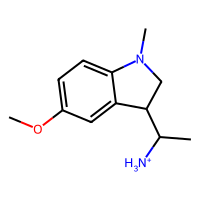
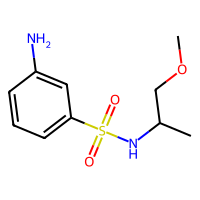
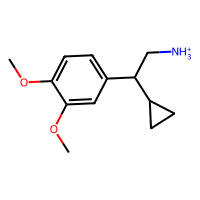
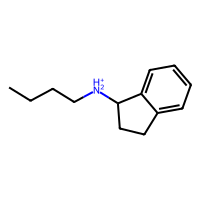
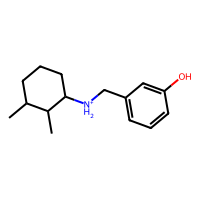
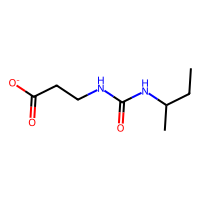

In [25]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='ZincSmiles', molCol='Zinc_Molecules')
df

In [26]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [27]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]
molecule

array([<rdkit.Chem.rdchem.Mol object at 0x7f6c63288eb0>,
       <rdkit.Chem.rdchem.Mol object at 0x7f6c63288f90>, ...,
       <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e650>], dtype=object)

In [28]:
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

ZincSmiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                        Zinc_Molecules       MW    LogP  HBD  \
0     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288eb0>  195.184  1.8404    1   
1     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288f20>  214.309  1.3429    2   
2     <rdkit.Chem.rdchem.Mol object at 0x7f6c63288f90>  169.248  1.3201    1   
3     <rdkit.Chem.rdchem.Mol object at 0x7f6c63289000>  210.728  2.1693    1   
4     <rdkit.Chem.rdchem.Mol object at 0x7f6c63289070>  207.297  0.8590    1   
...                                                ...      ...     ...  ...   
5995  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e490>  244.316  0.5820    2   
5996  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e500>  222.308  1.4393    1   
5997  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e570>  190.310  2.0374    1   
5998  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e5e0>  234.363  2.2803    2   
5999  <rdkit.Chem.rdchem.Mol object at 0x7f6c6315e650>  187.219 -0.7759    2   

      HBA    PSA  Aromatic Rings  Rotatable Bonds       QED  
0       1  43.09               0                1  0.681153  
1       2  52.57               0                5  0.678579  
2       2  53.67               1                4  0.738657  
3       0  16.61               1                2  0.770859  
4       2  40.11               1                2  0.781030  
...   ...    ...             ...              ...       ...  
5995    4  81.42               1                5  0.742397  
5996    2  46.10               1                5  0.819062  
5997    0  16.61               1                4  0.699701  
5998    1  36.84               1                3  0.826891  
5999    3  81.26               0                5  0.592315  

[6000 rows x 10 columns]

In [29]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [30]:
# Convert the fingerprint as an array 
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [31]:
QED = data.iloc[:,9].values

In [32]:
QED.shape[0] == fps.shape[0]

True

In [34]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, QED, train_size=0.8, random_state=seed)

In [35]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

QED_predict = svr.predict(X_test)
r2 = r2_score(y_test, QED_predict)
mse = mean_squared_error(y_test, QED_predict)

print('The r2_score is {} '.format(r2),'and the mean square error is {}'.format(mse))

The r2_score is 0.5305745883047662  and the mean square error is 0.00512430479205094


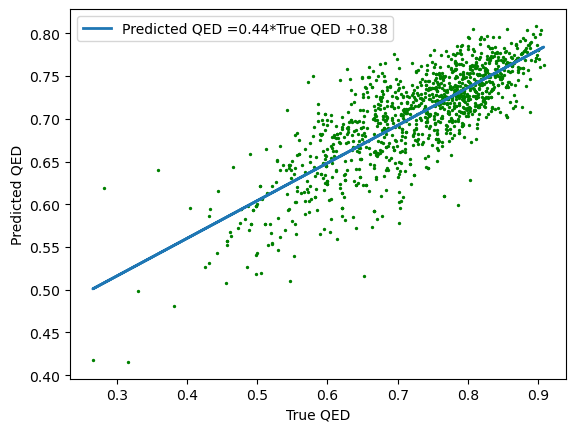

In [40]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, QED_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, QED_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted QED ='+str(round(vect_norm,2))+'*True QED +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True QED')
plt.ylabel('Predicted QED')
plt.legend()
plt.show()